<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Importing-Filtered-and-Renamed-Risk-Index-Data" data-toc-modified-id="Importing-Filtered-and-Renamed-Risk-Index-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Filtered and Renamed Risk Index Data</a></span></li><li><span><a href="#Data-Preparation-For-Clustering" data-toc-modified-id="Data-Preparation-For-Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation For Clustering</a></span><ul class="toc-item"><li><span><a href="#1A)-Replacing-&quot;x&quot;-with-NaN" data-toc-modified-id="1A)-Replacing-&quot;x&quot;-with-NaN-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1A) Replacing "x" with NaN</a></span></li><li><span><a href="#1B)-Replacing-NaN-with-appropriate-values" data-toc-modified-id="1B)-Replacing-NaN-with-appropriate-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>1B) Replacing NaN with appropriate values</a></span></li><li><span><a href="#1C)-Choosing-the-columns-from-our-risk-data-for-clustering-the-countries-based-on-various-risk-indices:" data-toc-modified-id="1C)-Choosing-the-columns-from-our-risk-data-for-clustering-the-countries-based-on-various-risk-indices:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>1C) Choosing the columns from our risk data for clustering the countries based on various risk indices:</a></span></li></ul></li><li><span><a href="#Clustering-Methods" data-toc-modified-id="Clustering-Methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clustering Methods</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#i)-K-means-Clustering" data-toc-modified-id="i)-K-means-Clustering-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>i) K-means Clustering</a></span><ul class="toc-item"><li><span><a href="#Creating-the-dataframe-for-comparing-Risk-Class-intervals-of-y_predict-and-y_actual" data-toc-modified-id="Creating-the-dataframe-for-comparing-Risk-Class-intervals-of-y_predict-and-y_actual-4.0.1.1"><span class="toc-item-num">4.0.1.1&nbsp;&nbsp;</span>Creating the dataframe for comparing Risk Class intervals of y_predict and y_actual</a></span></li></ul></li><li><span><a href="#ii)-Hierarchical-Clustering" data-toc-modified-id="ii)-Hierarchical-Clustering-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>ii) Hierarchical Clustering</a></span><ul class="toc-item"><li><span><a href="#Creating-the-dataframe-for-comparing-Risk-Class-intervals-of-y_hc_predict-and-y_actual" data-toc-modified-id="Creating-the-dataframe-for-comparing-Risk-Class-intervals-of-y_hc_predict-and-y_actual-4.0.2.1"><span class="toc-item-num">4.0.2.1&nbsp;&nbsp;</span>Creating the dataframe for comparing Risk Class intervals of y_hc_predict and y_actual</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Theory" data-toc-modified-id="Theory-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Theory</a></span><ul class="toc-item"><li><span><a href="#Theory-Behind-clustering-technique-&amp;-variables-used-for-clustering
----from-the-reference-material-" data-toc-modified-id="Theory-Behind-clustering-technique-&amp;-variables-used-for-clustering
----from-the-reference-material--5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Theory Behind clustering technique &amp; variables used for clustering
   <br> from the reference material </a></span></li></ul></li></ul></div>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image
from IPython.core.display import HTML 

### Importing Filtered and Renamed Risk Index Data

In [2]:
df_risk = pd.read_csv("C:/Users/user/Downloads/COVID-19 Related Info/Created Files/Risk Index-Filtered-Renamed.csv", index_col ="Country/Region")
df_risk.head()

,P2P,P2P_1,P2P_2,Vul,Vul_HI,Vul_1,Vul_11,Vul_12,Vul_13,Vul_2,...,LOCC_12,LOCC_2,LOCC_21,LOCC_22,LOCC_23,LOCC_3/LOCC_HD,LOCC_31,LOCC_32,INFORM COVID-19 RISK,COVID-19 RISK CLASS
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.4,6.0,6.6,6.4,8.2,7.9,8.6,7.7,6.8,8.5,...,7.9,8.3,7.2,9.6,7.1,7,6.5,7.5,6.8,Very High
Albania,3.6,0.9,5.0,4.1,1.9,2.1,1.9,2.1,2.3,1.7,...,4.8,3.7,0.06666666666666667,7.6,0.2,5,x,5,4.2,Medium
Algeria,4.3,1.4,5.7,3.6,3.0,2.5,3.1,3.3,0.3,3.4,...,5.9,4,1.4333333333333333,6.8,1.2,2.25,2,2.5,3.9,Medium
Angola,6.5,6.8,6.4,4.3,5.4,5.6,8.1,6.1,0.1,5.2,...,7.1,7.4,8.266666666666667,9.5,2.7,4.55,4.1,5,5.6,High
Antigua and Barbuda,2.8,1.0,3.7,3.4,2.7,2.9,2.5,x,3.7,2.4,...,5.0,3.7,3,6.9,0.5,5.4,5.8,5,3.6,Medium


### Data Preparation For Clustering

In [3]:
data = df_risk.copy()
# data = data.apply(pd.to_numeric, errors='ignore')
data.head(5)

,P2P,P2P_1,P2P_2,Vul,Vul_HI,Vul_1,Vul_11,Vul_12,Vul_13,Vul_2,...,LOCC_12,LOCC_2,LOCC_21,LOCC_22,LOCC_23,LOCC_3/LOCC_HD,LOCC_31,LOCC_32,INFORM COVID-19 RISK,COVID-19 RISK CLASS
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.4,6.0,6.6,6.4,8.2,7.9,8.6,7.7,6.8,8.5,...,7.9,8.3,7.2,9.6,7.1,7,6.5,7.5,6.8,Very High
Albania,3.6,0.9,5.0,4.1,1.9,2.1,1.9,2.1,2.3,1.7,...,4.8,3.7,0.06666666666666667,7.6,0.2,5,x,5,4.2,Medium
Algeria,4.3,1.4,5.7,3.6,3.0,2.5,3.1,3.3,0.3,3.4,...,5.9,4,1.4333333333333333,6.8,1.2,2.25,2,2.5,3.9,Medium
Angola,6.5,6.8,6.4,4.3,5.4,5.6,8.1,6.1,0.1,5.2,...,7.1,7.4,8.266666666666667,9.5,2.7,4.55,4.1,5,5.6,High
Antigua and Barbuda,2.8,1.0,3.7,3.4,2.7,2.9,2.5,x,3.7,2.4,...,5.0,3.7,3,6.9,0.5,5.4,5.8,5,3.6,Medium


#### 1A) Replacing "x" with NaN

In [4]:
data = data.replace('x', np.nan)
data.head(5)  

,P2P,P2P_1,P2P_2,Vul,Vul_HI,Vul_1,Vul_11,Vul_12,Vul_13,Vul_2,...,LOCC_12,LOCC_2,LOCC_21,LOCC_22,LOCC_23,LOCC_3/LOCC_HD,LOCC_31,LOCC_32,INFORM COVID-19 RISK,COVID-19 RISK CLASS
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.4,6.0,6.6,6.4,8.2,7.9,8.6,7.7,6.8,8.5,...,7.9,8.3,7.2,9.6,7.1,7,6.5,7.5,6.8,Very High
Albania,3.6,0.9,5.0,4.1,1.9,2.1,1.9,2.1,2.3,1.7,...,4.8,3.7,0.06666666666666667,7.6,0.2,5,NaN,5,4.2,Medium
Algeria,4.3,1.4,5.7,3.6,3.0,2.5,3.1,3.3,0.3,3.4,...,5.9,4,1.4333333333333333,6.8,1.2,2.25,2,2.5,3.9,Medium
Angola,6.5,6.8,6.4,4.3,5.4,5.6,8.1,6.1,0.1,5.2,...,7.1,7.4,8.266666666666667,9.5,2.7,4.55,4.1,5,5.6,High
Antigua and Barbuda,2.8,1.0,3.7,3.4,2.7,2.9,2.5,NaN,3.7,2.4,...,5.0,3.7,3,6.9,0.5,5.4,5.8,5,3.6,Medium


In [5]:
data.isna().sum()

P2P                      0
P2P_1                    0
P2P_2                    0
Vul                      0
Vul_HI                   0
Vul_1                    0
Vul_11                   0
Vul_12                  14
Vul_13                   0
Vul_2                    0
Vul_21                   0
Vul_22                   1
Vul_23                   0
Vul_24                  28
Vul_3/Vul_HD             0
Vul_31                   0
Vul_32                   0
Vul_33                   7
LOCC                     0
LOCC_HI                  0
LOCC_1                   0
LOCC_11                 14
LOCC_12                  0
LOCC_2                   1
LOCC_21                  1
LOCC_22                  4
LOCC_23                  7
LOCC_3/LOCC_HD           1
LOCC_31                 15
LOCC_32                  3
INFORM COVID-19 RISK     0
COVID-19 RISK CLASS      0
dtype: int64

#### 1B) Replacing NaN with appropriate values

In [6]:
for i in range(0, data.shape[0]):
#     if data['Vul_12'][i] == "x":
    if pd.isna(data['Vul_12'][i])==True:
        data['Vul_12'].iloc[i]= data['Vul_1'].iloc[i]
        
for i in range(0, data.shape[0]):
    if pd.isna(data['Vul_22'][i])==True:
        data['Vul_22'].iloc[i]= data['Vul_2'].iloc[i]
    if pd.isna(data['Vul_24'][i])==True:
        data['Vul_24'].iloc[i]= data['Vul_2'].iloc[i]
        
for i in range(0, data.shape[0]):
    if pd.isna(data['Vul_33'][i])==True:
        data['Vul_33'].iloc[i]= data['Vul_3/Vul_HD'].iloc[i]
        
for i in range(0, data.shape[0]):
    if pd.isna(data['LOCC_11'][i])==True:
        data['LOCC_11'].iloc[i]= data['LOCC_1'].iloc[i]
        
for i in range(0, data.shape[0]):
    if pd.isna(data['LOCC_2'][i])==True:
        data['LOCC_2'].iloc[i]= data['LOCC_HI'].iloc[i]
        
for i in range(0, data.shape[0]):
    if pd.isna(data['LOCC_21'][i])==True:
        data['LOCC_21'].iloc[i]= data['LOCC_2'].iloc[i]
    if pd.isna(data['LOCC_22'][i])==True:
        data['LOCC_22'].iloc[i]= data['LOCC_2'].iloc[i]
    if pd.isna(data['LOCC_23'][i])==True:
        data['LOCC_23'].iloc[i]= data['LOCC_2'].iloc[i]
        
for i in range(0, data.shape[0]):
    if pd.isna(data['LOCC_3/LOCC_HD'][i])==True:
        data['LOCC_3/LOCC_HD'].iloc[i]= data['LOCC'].iloc[i]
        
for i in range(0, data.shape[0]):
    if pd.isna(data['LOCC_31'][i])==True:
        data['LOCC_31'].iloc[i]= data['LOCC_3/LOCC_HD'].iloc[i]
    if pd.isna(data['LOCC_32'][i])==True:
        data['LOCC_32'].iloc[i]= data['LOCC_3/LOCC_HD'].iloc[i]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
# df_risk.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/Created Files/RiskIndex-MissingValues-Present.csv")
# data.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/Created Files/RiskIndex-MissingValues-Checked.csv")

In [8]:
# data.isna().sum()

####  1C) Choosing the columns from our risk data for clustering the countries based on various risk indices: 

 <b> Choosing only 1 column as is implied by the pdf for getting the class intervals for the countries to fall under particular risk indices </b>

In [9]:
# data_5cat = data.loc[:,['P2P','Vul_HI','Vul_3/Vul_HD','LOCC_HI','LOCC_3/LOCC_HD','INFORM COVID-19 RISK', 'COVID-19 RISK CLASS']]
# X =data_5cat.iloc[:,:-1].values # Considering only two independent variables namely Annual income and spending score. 
# y= data.iloc[].values
data_1cat = data.loc[:,['INFORM COVID-19 RISK', 'COVID-19 RISK CLASS']]
X = data_1cat.iloc[:, :-1].values

In [10]:
data.head()

,P2P,P2P_1,P2P_2,Vul,Vul_HI,Vul_1,Vul_11,Vul_12,Vul_13,Vul_2,...,LOCC_12,LOCC_2,LOCC_21,LOCC_22,LOCC_23,LOCC_3/LOCC_HD,LOCC_31,LOCC_32,INFORM COVID-19 RISK,COVID-19 RISK CLASS
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.4,6.0,6.6,6.4,8.2,7.9,8.6,7.7,6.8,8.5,...,7.9,8.3,7.2,9.6,7.1,7,6.5,7.5,6.8,Very High
Albania,3.6,0.9,5.0,4.1,1.9,2.1,1.9,2.1,2.3,1.7,...,4.8,3.7,0.06666666666666667,7.6,0.2,5,5,5,4.2,Medium
Algeria,4.3,1.4,5.7,3.6,3.0,2.5,3.1,3.3,0.3,3.4,...,5.9,4,1.4333333333333333,6.8,1.2,2.25,2,2.5,3.9,Medium
Angola,6.5,6.8,6.4,4.3,5.4,5.6,8.1,6.1,0.1,5.2,...,7.1,7.4,8.266666666666667,9.5,2.7,4.55,4.1,5,5.6,High
Antigua and Barbuda,2.8,1.0,3.7,3.4,2.7,2.9,2.5,2.9,3.7,2.4,...,5.0,3.7,3,6.9,0.5,5.4,5.8,5,3.6,Medium


### Clustering Methods

##### i) K-means Clustering

In [11]:
## 2. Using the elbow method to find optimal number of clusters

# To plot this graph we will compute the within cluster sum of squares (wcss) for 10 different numbers of clusters.

# So since we're going to have 10 iterations we are going to write a for loop to create a list of the 10 different within 

# cluster sum of squares for the numbers of clusters. 

# Now in each iteration of this loop we are going to do two things:

# i) First we will fit the K-means algorithm to our data x.

# ii) And second we will compute the within cluster sum of squares and append it to our wcss list.


from sklearn.cluster import KMeans

wcss = [] # initializing our Within Cluster Sum of Squares list, it will have appended values for wcss for different no. of 
          # clusters from 1 to 10 through the for loop before.

    
    
# PREPARATION OF K-MEANS ALGORITHM
for i in range(1,11):     #Upper bound not included
       kmeans=KMeans(n_clusters=i, init="k-means++",max_iter=300, n_init=10, random_state=0 ) 
# FITTING K-MEANS ALGORITHM TO THE DATA
       kmeans.fit(X) 
# COMPUTING WITHIN CLUSTER SUM OF SQUARES AND APPEND IT TO OUR LIST wcss (a.k.a. inertia)
       wcss.append(kmeans.inertia_)  # inertia is an attribute in scikit library to compute wcss and to append it to our list 
                                     # we write the above line of code


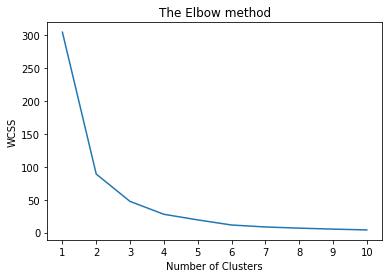

In [12]:
### Plotting the Elbow method graph

plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1, 11, 1.0))
plt.show()

In [13]:
## 3. Fitting K-means clustering algorithm to the dataset 
### (with optimal number of clusters)

kmeans=KMeans(n_clusters=5, init="k-means++",max_iter=300, n_init=10, random_state=0 ) 
y_predict = kmeans.fit_predict(X)
# fit_predict method returns for each observation, which cluster it belongs to. And cluster numbers are returned to a single 
# vector that we are going to call y_kmeans

y_predict

array([0, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 4, 1, 1, 3, 1, 2, 1, 4, 1, 4,
       1, 3, 1, 2, 0, 4, 4, 2, 3, 0, 0, 3, 1, 4, 2, 2, 0, 1, 2, 1, 1, 1,
       1, 3, 2, 1, 4, 1, 1, 1, 2, 2, 3, 2, 2, 1, 3, 3, 4, 2, 1, 3, 4, 1,
       1, 4, 2, 2, 1, 0, 4, 1, 3, 4, 4, 1, 4, 3, 3, 3, 1, 3, 4, 3, 2, 2,
       4, 3, 1, 1, 4, 1, 4, 2, 2, 4, 3, 3, 3, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 4, 4, 1, 1, 4, 2, 4, 4, 4, 4, 3, 3, 4, 2, 2, 1, 3, 3, 2, 1, 4,
       1, 2, 1, 4, 4, 3, 3, 1, 1, 1, 4, 1, 1, 1, 1, 4, 3, 4, 1, 1, 2, 3,
       1, 3, 2, 0, 4, 0, 3, 4, 2, 1, 3, 3, 4, 4, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 4, 2, 1, 3, 3, 3, 1, 1, 4, 4, 1, 2, 2, 2])

In [14]:
y_predict = pd.Series(y_predict)

In [15]:
# To have numeric index for y_actual below and not "Country/Region" as index. So that the index matches with y_predict above
data_1cat = data_1cat.reset_index()

In [16]:
y_actual = data_1cat["COVID-19 RISK CLASS"]
# y_actual

###### Creating the dataframe for comparing Risk Class intervals of y_predict and y_actual

In [17]:
df_clusters_km = pd.concat([data_1cat["Country/Region"], data_1cat["INFORM COVID-19 RISK"], y_predict, y_actual,], axis = 1, ignore_index=True)
df_clusters_km = df_clusters_km.rename( columns = { 0: "Country/Region", 1:"INFORM COVID-19 RISK", 2: "Cluster number_K-Mean", 3 : "Actual Value"})
df_clusters_km.head()


,Country/Region,INFORM COVID-19 RISK,Cluster number_K-Mean,Actual Value
0,Afghanistan,6.8,0,Very High
1,Albania,4.2,1,Medium
2,Algeria,3.9,1,Medium
3,Angola,5.6,2,High
4,Antigua and Barbuda,3.6,1,Medium


In [18]:
df_3 = df_clusters_km[df_clusters_km["Cluster number_K-Mean"]==3] 
# print("min for cluster 3: ", df_3["INFORM COVID-19 RISK"].min() , "\n" , "max for cluster 3: " , df_3["INFORM COVID-19 RISK"].max())
print("Range for cluster 3: ", df_3["INFORM COVID-19 RISK"].min() , " - " , df_3["INFORM COVID-19 RISK"].max())


df_1 = df_clusters_km[df_clusters_km["Cluster number_K-Mean"]==1] 
print("Range for cluster 1: ", df_1["INFORM COVID-19 RISK"].min() , " - " , df_1["INFORM COVID-19 RISK"].max())

df_4 = df_clusters_km[df_clusters_km["Cluster number_K-Mean"]==4] 
print("Range for cluster 4: ", df_4["INFORM COVID-19 RISK"].min() , " - " , df_4["INFORM COVID-19 RISK"].max())

df_2 = df_clusters_km[df_clusters_km["Cluster number_K-Mean"]==2] 
print("Range for cluster 2: ", df_2["INFORM COVID-19 RISK"].min() , " - " , df_2["INFORM COVID-19 RISK"].max())

df_0 = df_clusters_km[df_clusters_km["Cluster number_K-Mean"]==0] 
print("Range for cluster 0: ", df_0["INFORM COVID-19 RISK"].min() , " - " , df_0["INFORM COVID-19 RISK"].max())


Range for cluster 3:  1.9  -  3.1
Range for cluster 1:  3.2  -  4.2
Range for cluster 4:  4.3  -  5.2
Range for cluster 2:  5.3  -  6.4
Range for cluster 0:  6.5  -  7.6


In [19]:
table_actual_classes = {'Risk Class Labels':  ['Very Low', 'Low',"Medium", "High", "Very High"],
        'INFORM Risk Intervals': ['<2', '2 - 3.4',"3.5 - 4.9","5 - 6.4", ">= 6.5"], 
        'K-Means Modelled Risk Intervals': ["1.9 - 3.1", "3.2 - 4.2", "4.3 - 5.2","5.3 - 6.4", "6.5 - 7.6" ]
                }
table = pd.DataFrame(table_actual_classes, columns = ['Risk Class Labels','INFORM Risk Intervals','K-Means Modelled Risk Intervals'])
table = table.set_index("Risk Class Labels")
table

,INFORM Risk Intervals,K-Means Modelled Risk Intervals
Risk Class Labels,,
Very Low,<2,1.9 - 3.1
Low,2 - 3.4,3.2 - 4.2
Medium,3.5 - 4.9,4.3 - 5.2
High,5 - 6.4,5.3 - 6.4
Very High,>= 6.5,6.5 - 7.6


In [20]:
df_clusters_km["Cluster number_K-Mean"] = df_clusters_km["Cluster number_K-Mean"].replace({0:"Very High", 2:"High", 1: "Low", 3:"Very Low", 4:"Medium"})
df_clusters_km.head()

,Country/Region,INFORM COVID-19 RISK,Cluster number_K-Mean,Actual Value
0,Afghanistan,6.8,Very High,Very High
1,Albania,4.2,Low,Medium
2,Algeria,3.9,Low,Medium
3,Angola,5.6,High,High
4,Antigua and Barbuda,3.6,Low,Medium


In [21]:
from sklearn.metrics import confusion_matrix
labels = np.unique(df_clusters_km["Actual Value"])
a =  confusion_matrix(y_true = df_clusters_km["Actual Value"], y_pred = df_clusters_km["Cluster number_K-Mean"],labels=labels)

pd.DataFrame(a, index=labels, columns=labels)

,High,Low,Medium,Very High,Very Low
High,39,0,13,0,0
Low,0,17,0,0,33
Medium,0,51,27,0,0
Very High,0,0,0,8,0
Very Low,0,0,0,0,3


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
round(accuracy_score(df_clusters_km["Actual Value"], df_clusters_km["Cluster number_K-Mean"]),3)

0.492

##### ii) Hierarchical Clustering

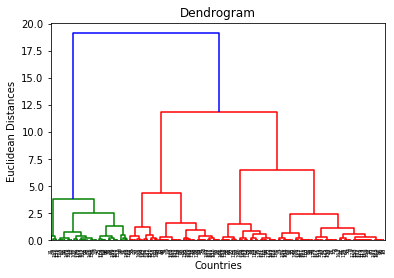

In [23]:
## Using the Dendogram to find optimal number of clusters

# To do this import scipy library (not whole library but the tools it contains to build our dendogram), open source python 
# library that contains tools to do hierarchical clustering and building programs
import scipy.cluster.hierarchy as sch

# Building Dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distances")
plt.show()

# sch.dendrogram -> sch is object of class scipy.cluster.hierarchy and dendrogram is method from that class
# linkage is the algorithm of hierarchical clustering
# "ward" method tries to minimize the variance within each cluster
# In kmeans clustering we used to try to minimize "within cluster sum of squares", here in hierarchical clustering we try to 
# minimize "within cluster variance"

In [24]:
### Optimal number of clusters = 5

# How?
# To choose the optimal number of clusters: Look for the longest vertical line without any horizontal line crossing.
# We conclude that 5 is the optimal number of clusters, looking at the dendrogram, for our problem.
# Refer to video for more clarity: https://www.udemy.com/course/machinelearning/learn/lecture/5685600#questions

## 3. Fitting Hierarchical Clustering to the dataset

# There are two types of hierarchical clustering:
# 1. Agglomerative Hierarchical clustering
# 2. Divisive Hierarchical clustering

# We will use Agglomerative Hierarchical clustering and the class we are going to use to fit hierarchical clustering to our 
# dataset is agglomerative clustering class from scikit learn library

from sklearn.cluster import AgglomerativeClustering

# Preparing Hierarchical clustering algorithm
hc= AgglomerativeClustering(n_clusters=5, 
                            affinity="euclidean", # affinity stands here for distance
                            linkage="ward") # method to minimize variance in each cluster


# Fitting Hierarchical Clustering algorithm to our data while creating the cluster vector that is the vector that tells for each 
# customer which cluster the customer belongs to, named y_hc
y_hc_predict = hc.fit_predict(X)


In [25]:
print(y_hc_predict)

[0 2 2 0 2 1 2 4 1 2 2 2 3 2 2 1 2 0 2 3 2 3 2 1 2 0 0 3 3 0 4 0 0 1 1 2 0
 0 0 1 0 2 1 1 1 4 0 2 2 2 2 2 0 0 1 3 0 2 4 1 3 0 2 4 3 1 2 3 0 0 2 0 3 1
 4 3 2 2 3 1 1 1 2 4 2 1 0 0 3 1 2 2 3 1 3 0 0 2 4 1 1 0 0 1 2 0 2 0 0 2 2
 3 2 2 2 2 0 3 3 3 3 4 4 3 0 0 2 4 1 3 2 3 2 0 2 2 3 1 1 1 2 1 3 1 2 2 1 3
 1 3 2 2 0 4 1 1 0 0 3 0 1 2 0 2 4 4 3 2 0 2 0 0 2 2 2 2 1 3 0 2 4 4 4 1 2
 3 2 2 0 0 3]


###### Creating the dataframe for comparing Risk Class intervals of y_hc_predict and y_actual

In [26]:
y_hc_predict = pd.Series(y_hc_predict)

# To have numeric index for y_actual below and not "Country/Region" as index. So that the index matches with y_predict above
# data = data.reset_index()

# y_actual = data["COVID-19 RISK CLASS"]
# y_actual

df_clusters_hc = pd.concat([data_1cat["Country/Region"],data_1cat["INFORM COVID-19 RISK"], y_hc_predict, y_actual,], axis = 1, ignore_index=True)
df_clusters_hc = df_clusters_hc.rename( columns = { 0: "Country/Region", 1: "INFORM COVID-19 RISK", 2:"Cluster number_hc", 3: "Actual Value"})
df_clusters_hc.head()




,Country/Region,INFORM COVID-19 RISK,Cluster number_hc,Actual Value
0,Afghanistan,6.8,0,Very High
1,Albania,4.2,2,Medium
2,Algeria,3.9,2,Medium
3,Angola,5.6,0,High
4,Antigua and Barbuda,3.6,2,Medium


In [27]:
df_4 = df_clusters_hc[df_clusters_hc["Cluster number_hc"]==4] 
print("Range for cluster 4: ", df_4["INFORM COVID-19 RISK"].min() , " - " , df_4["INFORM COVID-19 RISK"].max())


df_1 = df_clusters_hc[df_clusters_hc["Cluster number_hc"]==1] 
print("Range for cluster 1: ", df_1["INFORM COVID-19 RISK"].min() , " - " , df_1["INFORM COVID-19 RISK"].max())


df_2 = df_clusters_hc[df_clusters_hc["Cluster number_hc"]==2] 
print("Range for cluster 2: ", df_2["INFORM COVID-19 RISK"].min() , " - " , df_2["INFORM COVID-19 RISK"].max())

df_3 = df_clusters_hc[df_clusters_hc["Cluster number_hc"]==3] 
print("Range for cluster 3: ", df_3["INFORM COVID-19 RISK"].min() , " - " , df_3["INFORM COVID-19 RISK"].max())


df_0 = df_clusters_hc[df_clusters_hc["Cluster number_hc"]==0] 
print("Range for cluster 0: ", df_0["INFORM COVID-19 RISK"].min() , " - " , df_0["INFORM COVID-19 RISK"].max())


Range for cluster 4:  1.9  -  2.6
Range for cluster 1:  2.7  -  3.4
Range for cluster 2:  3.5  -  4.4
Range for cluster 3:  4.5  -  5.3
Range for cluster 0:  5.4  -  7.6


In [28]:
table_actual_classes = {'Risk Class Labels':  ['Very Low', 'Low',"Medium", "High", "Very High"],
        'INFORM Risk Intervals': ['<2', '2 - 3.4',"3.5 - 4.9","5 - 6.4", ">= 6.5"], 
        'H-cluster Modelled Risk Intervals': ["1.9 - 2.6", "2.7 - 3.4", "3.5 - 4.4","4.5 - 5.3", "5.4 - 7.6" ]
                }
table = pd.DataFrame(table_actual_classes, columns = ['Risk Class Labels','INFORM Risk Intervals','H-cluster Modelled Risk Intervals'])
table = table.set_index("Risk Class Labels")
table

,INFORM Risk Intervals,H-cluster Modelled Risk Intervals
Risk Class Labels,,
Very Low,<2,1.9 - 2.6
Low,2 - 3.4,2.7 - 3.4
Medium,3.5 - 4.9,3.5 - 4.4
High,5 - 6.4,4.5 - 5.3
Very High,>= 6.5,5.4 - 7.6


In [29]:
df_clusters_hc["Cluster number_hc"] = df_clusters_hc["Cluster number_hc"].replace({0:"Very High", 1:"Low", 2: "Medium", 3:"High", 4:"Very Low"})
df_clusters_hc.head()

,Country/Region,INFORM COVID-19 RISK,Cluster number_hc,Actual Value
0,Afghanistan,6.8,Very High,Very High
1,Albania,4.2,Medium,Medium
2,Algeria,3.9,Medium,Medium
3,Angola,5.6,Very High,High
4,Antigua and Barbuda,3.6,Medium,Medium


In [30]:
from sklearn.metrics import confusion_matrix

labels = np.unique(df_clusters_hc["Actual Value"])
a =  confusion_matrix(y_true = df_clusters_hc["Actual Value"],y_pred = df_clusters_hc["Cluster number_hc"], labels=labels)

pd.DataFrame(a, index=labels, columns=labels)

,High,Low,Medium,Very High,Very Low
High,16,0,0,36,0
Low,0,36,0,0,14
Medium,16,0,62,0,0
Very High,0,0,0,8,0
Very Low,0,0,0,0,3


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
round(accuracy_score(df_clusters_hc["Actual Value"], df_clusters_hc["Cluster number_hc"]),3)

0.654

### Theory 

<h4>Theory Behind clustering technique & variables used for clustering
   <br> from the reference material </h4> 

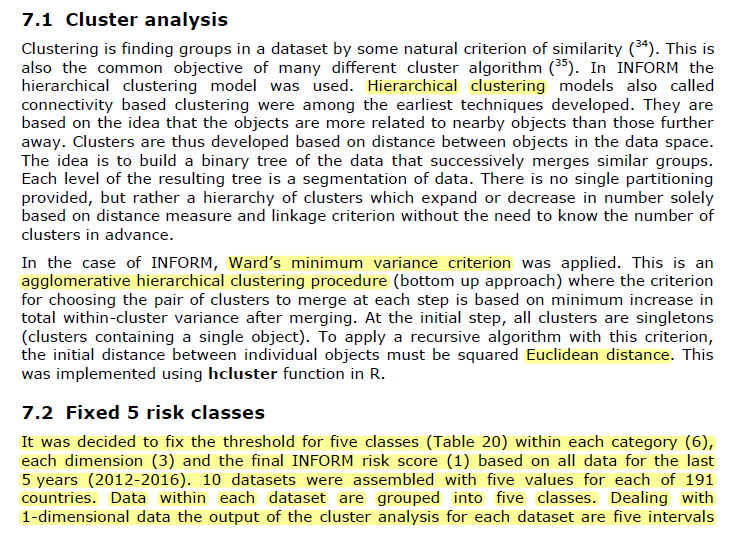

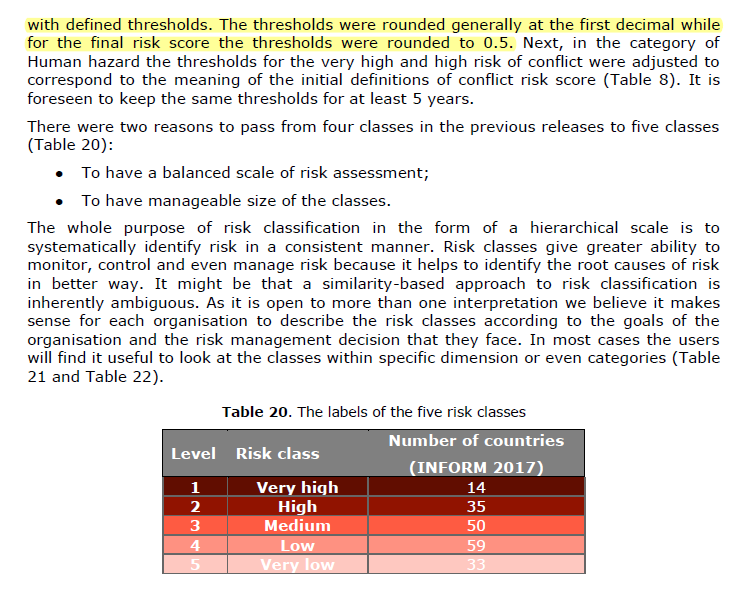

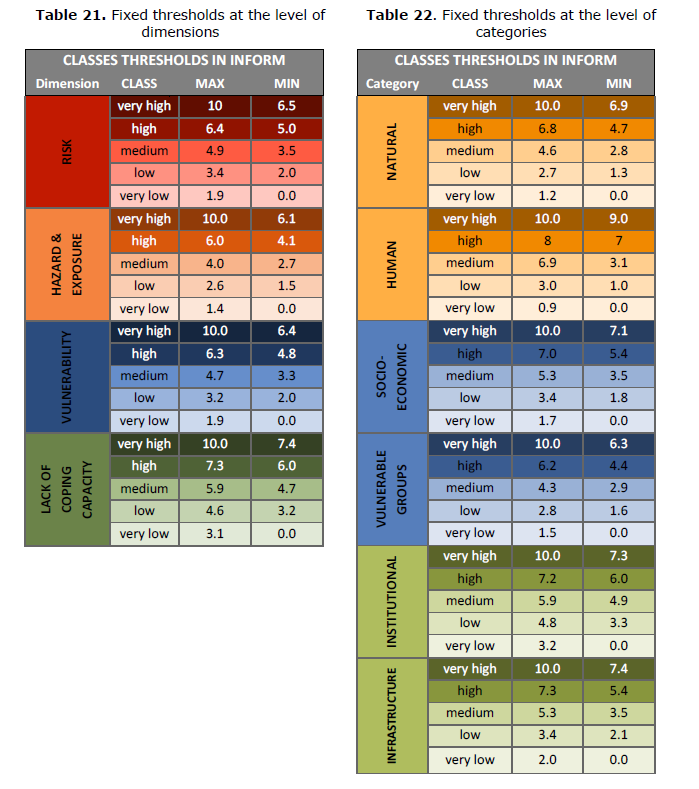

In [33]:
i1 = Image(r"C:/Users/user/Downloads/COVID-19 Related info/Python Files/img1.png", width=500, height=550)
i2 = Image(r"C:/Users/user/Downloads/COVID-19 Related info/Python Files/img2.png", width=500, height=550)
i3 = Image(r"C:/Users/user/Downloads/COVID-19 Related info/Python Files/img3.png", width=500, height=550)
display(i1, i2, i3)